# example: Keras 1D convolutional neural network on iris dataset

In [1]:
%autosave 120
import numpy as np
np.random.seed(1337)
import datetime
from IPython.display import SVG
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
import matplotlib
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import sys
import talos as ta
import tensorflow as tf
from tensorflow.python.client.device_lib import list_local_devices
import warnings

pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows",    500)
sns.set_palette('husl')
sns.set(style='ticks')
warnings.filterwarnings("ignore")

print('Python version:', sys.version)
print('Matplotlib version:', matplotlib.__version__)
print('NumPy version:', np.__version__)
print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)
list_local_devices()

Autosaving every 120 seconds


Using TensorFlow backend.


Python version: 3.7.6 (default, Jan  8 2020, 19:59:22) 
[GCC 7.3.0]
Matplotlib version: 3.1.2
NumPy version: 1.18.1
Keras version: 2.3.1
TensorFlow version: 2.0.0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13250552599159424530, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7266547980662891179
 physical_device_desc: "device: XLA_CPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 7648978535
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 989703267512999395
 physical_device_desc: "device: 0, name: GeForce GTX 1070, pci bus id: 0000:01:00.0, compute capability: 6.1", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11038636402738061563
 physical_device_desc: "device: XLA_GPU device"]

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

# iris dataset

In [3]:
df = pd.read_csv(
    'iris.csv',
    header = None,
    names  = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


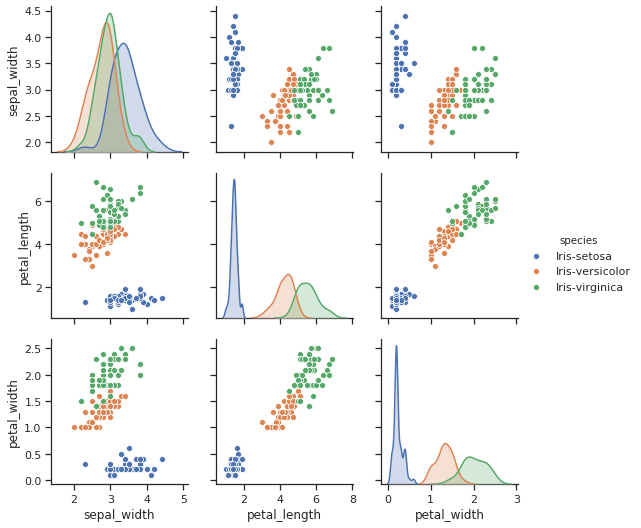

In [4]:
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(df.iloc[:, 1:6], hue="species");

In [5]:
df['labels'] = df['species'].astype('category').cat.codes
x = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['labels']
# Convert class vectors to binary class matrices using 1 hot encoding.
# 0 ---> 1, 0, 0
# 1 ---> 0, 1, 0
# 2 ---> 0, 0, 1
num_classes = len(y.unique())
y = keras.utils.to_categorical(y, len(y.unique()))

x = np.asarray(x)
y = np.asarray(y)

x = x.reshape(len(x), 4, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True, random_state=1)

# model and training

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 3,731
Trainable params: 3,731
Non-trainable params: 0
____________________________________________________

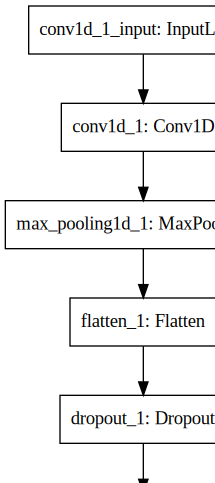

In [6]:
model = Sequential()
model.add(Conv1D(32, (3), input_shape=(4, 1), activation='tanh'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=['accuracy'])
plot_model(model, to_file="model.png")
model.summary()
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [7]:
%%time
out = model.fit(
    x_train,
    y_train,
    batch_size      = 128,
    epochs          = 200,
    verbose         = False,
    validation_data = (x_test, y_test)
)
score = model.evaluate(x_test, y_test, verbose=False)

CPU times: user 2.45 s, sys: 289 ms, total: 2.74 s
Wall time: 2.21 s


test loss: 0.03527910582721233
test accuracy: 1.0


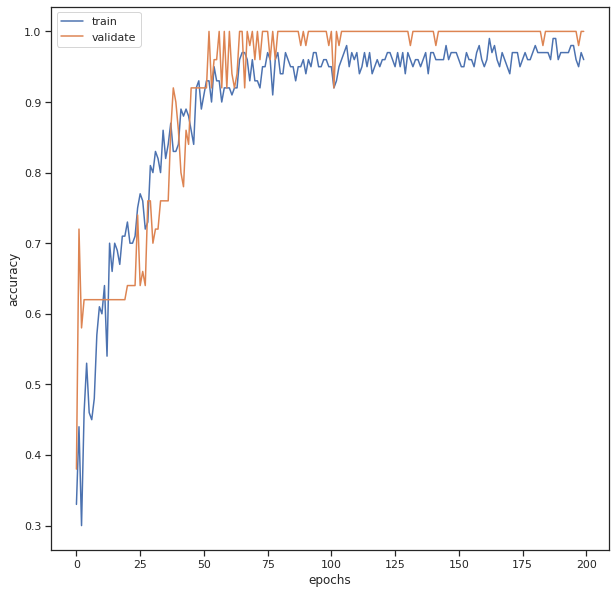

In [8]:
print('test loss:', score[0])
print('test accuracy:', score[1])
#print('max. test accuracy observed:', max(history.val_acc))
#print('max. test accuracy history index:', history.val_acc.index(max(history.val_acc)))
plt.plot(out.history['accuracy'], label='train')
plt.plot(out.history['val_accuracy'], label='validate')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.show()

# hyperparameter scan using Talos

- [Talos examples](https://nbviewer.jupyter.org/github/autonomio/talos/blob/master/examples/Hyperparameter%20Optimization%20with%20Keras%20for%20the%20Iris%20Prediction.ipynb#six)

In [9]:
plt.rcParams["figure.figsize"] = [10, 6]

  0%|          | 0/32 [00:00<?, ?it/s]

start: 2020-01-20T200320Z
{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 10, 'dropout': 0.9, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200321Z
test loss: 0.5663310567537944
test accuracy: 0.6222222447395325
max. test accuracy observed: 0.6222222447395325
max. test accuracy history index: 9


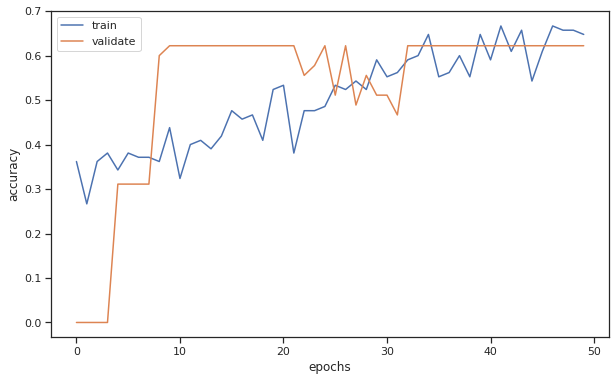

  3%|▎         | 1/32 [00:01<00:40,  1.30s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 100, 'dense_2': 200, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200322Z
test loss: 0.12401553831166691
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 6


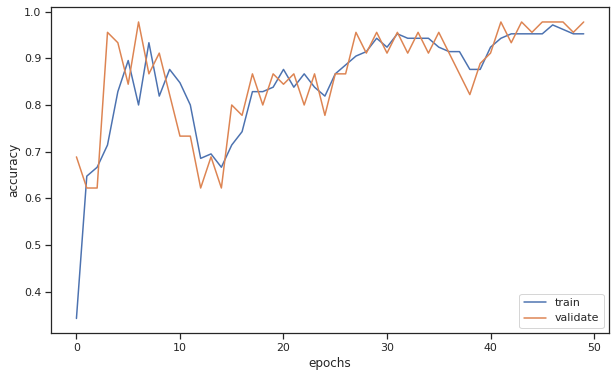

  6%|▋         | 2/32 [00:02<00:39,  1.30s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 10, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200323Z
test loss: 0.4252107448048062
test accuracy: 0.9555555582046509
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 39


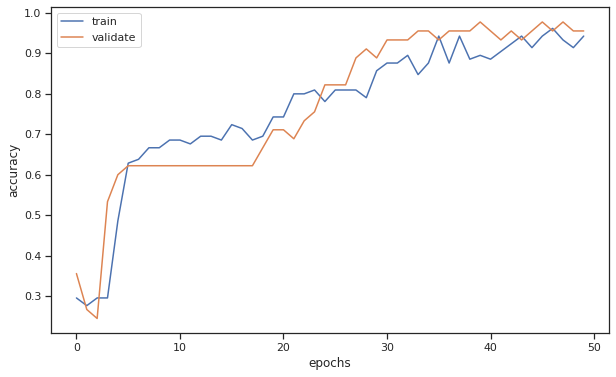

  9%|▉         | 3/32 [00:03<00:37,  1.28s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 100, 'dense_2': 100, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200325Z
test loss: 0.1408618582619561
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 37


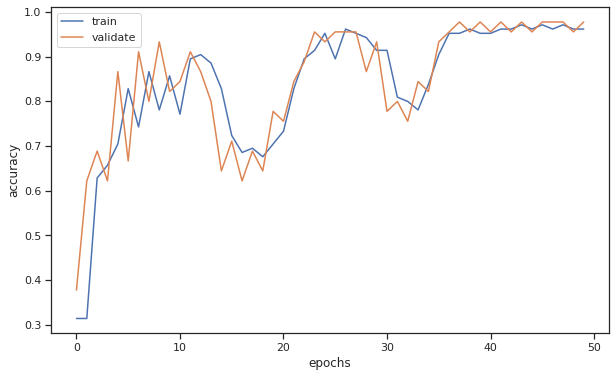

 12%|█▎        | 4/32 [00:05<00:35,  1.26s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 50, 'dropout': 0.9, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200326Z
test loss: 0.4976648105515374
test accuracy: 0.8666666746139526
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 27


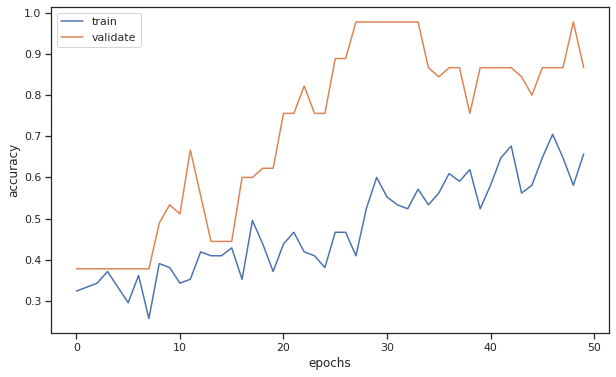

 16%|█▌        | 5/32 [00:06<00:33,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 200, 'dense_2': 100, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200327Z
test loss: 0.21134081383546194
test accuracy: 0.9333333373069763
max. test accuracy observed: 0.9555555582046509
max. test accuracy history index: 32


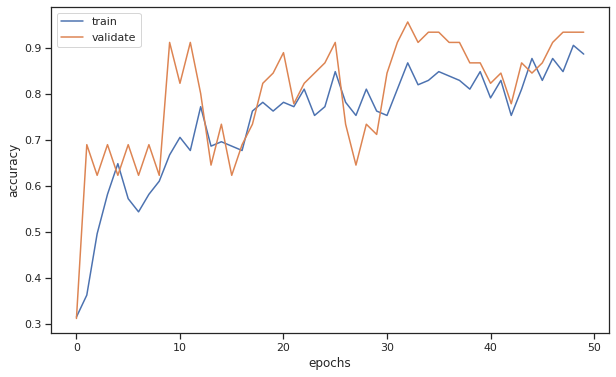

 19%|█▉        | 6/32 [00:07<00:32,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 50, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200328Z
test loss: 0.18785216212272643
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 13


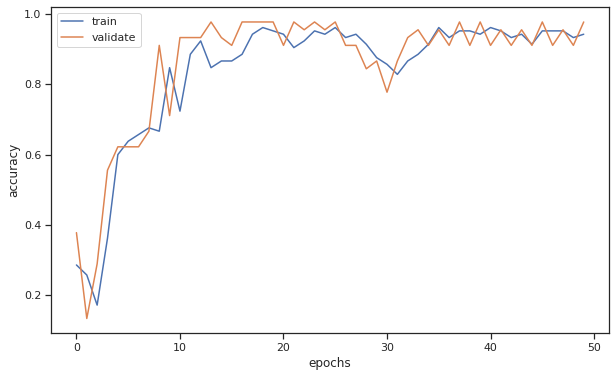

 22%|██▏       | 7/32 [00:08<00:31,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 10, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200330Z
test loss: 0.5975160956382751
test accuracy: 0.6222222447395325
max. test accuracy observed: 0.6222222447395325
max. test accuracy history index: 22


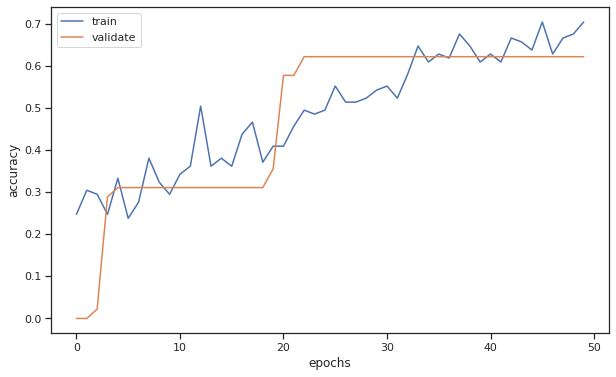

 25%|██▌       | 8/32 [00:09<00:29,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 10, 'dropout': 0.05, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200331Z
test loss: 0.24404326180617014
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 39


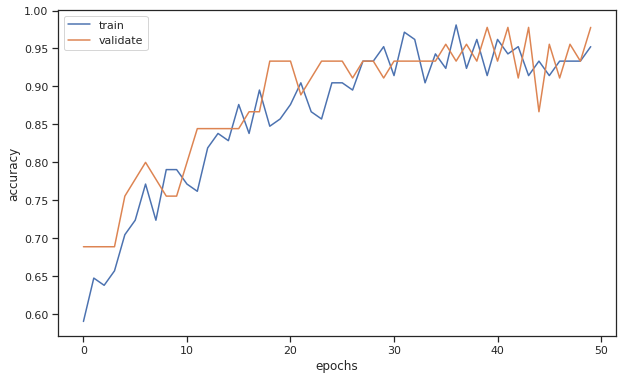

 28%|██▊       | 9/32 [00:11<00:28,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 100, 'dropout': 0.9, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200332Z
test loss: 0.48173877265718246
test accuracy: 0.7555555701255798
max. test accuracy observed: 0.9555555582046509
max. test accuracy history index: 23


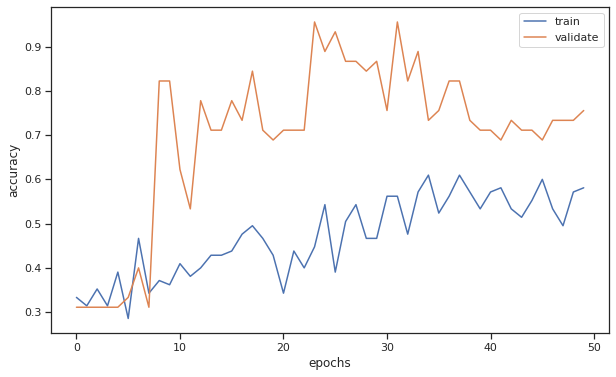

 31%|███▏      | 10/32 [00:12<00:27,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 200, 'dense_2': 100, 'dropout': 0.9, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200333Z
test loss: 0.35385855502552455
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 7


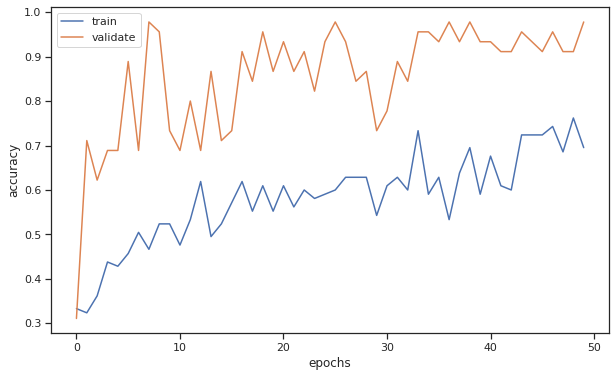

 34%|███▍      | 11/32 [00:13<00:26,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 100, 'dense_2': 50, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200335Z
test loss: 0.19609224879079395
test accuracy: 0.9333333373069763
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 21


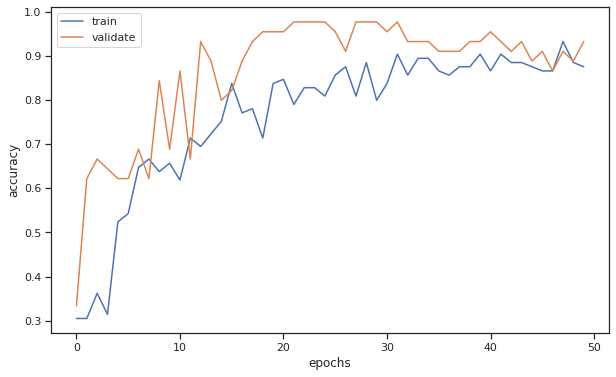

 38%|███▊      | 12/32 [00:14<00:24,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 100, 'dense_2': 50, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200336Z
test loss: 0.1513881653547287
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 8


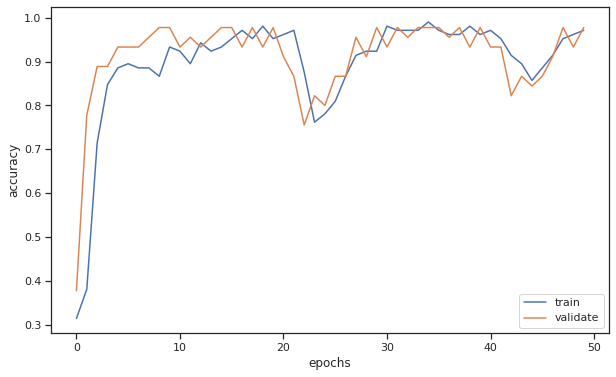

 41%|████      | 13/32 [00:16<00:23,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 100, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200337Z
test loss: 0.2053980991244316
test accuracy: 0.9555555582046509
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 26


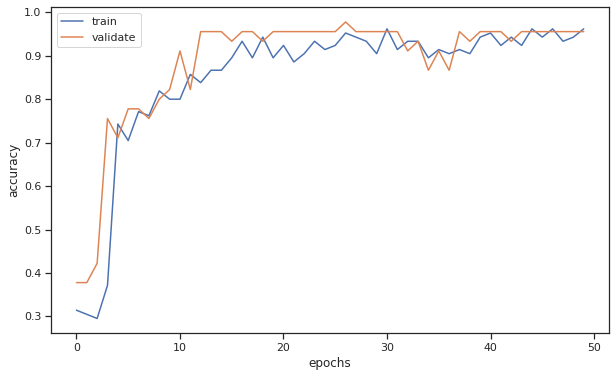

 44%|████▍     | 14/32 [00:17<00:22,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 200, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200338Z
test loss: 0.1737949771185716
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 20


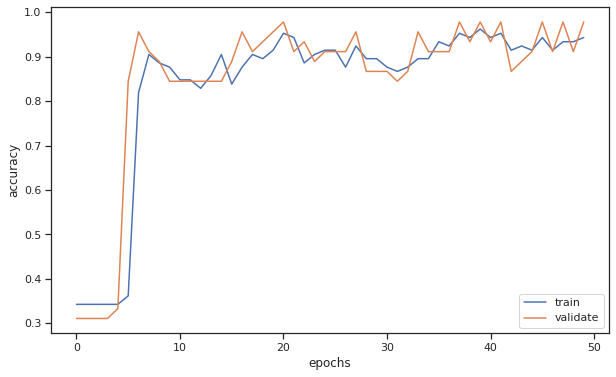

 47%|████▋     | 15/32 [00:18<00:21,  1.24s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 100, 'dense_2': 10, 'dropout': 0.05, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200340Z
test loss: 0.22092548294199837
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 19


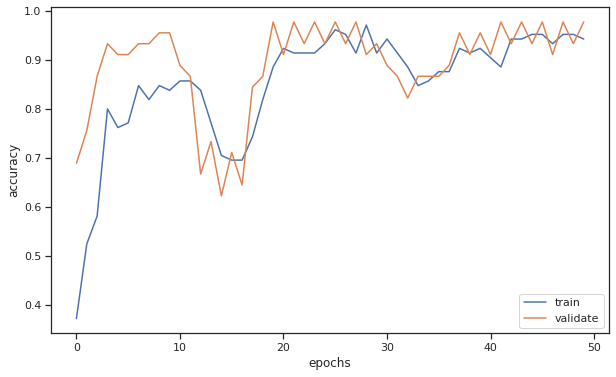

 50%|█████     | 16/32 [00:19<00:19,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 200, 'dropout': 0.05, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200341Z
test loss: 0.19300670532716646
test accuracy: 0.9555555582046509
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 7


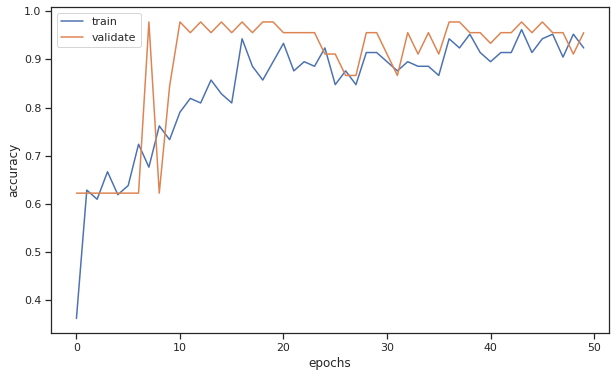

 53%|█████▎    | 17/32 [00:21<00:18,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 200, 'dropout': 0.05, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200342Z
test loss: 0.14768302821450763
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 35


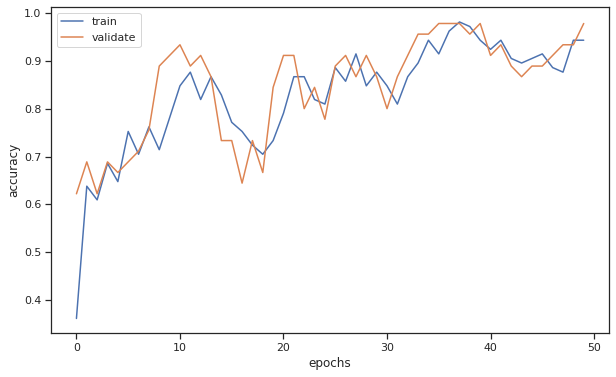

 56%|█████▋    | 18/32 [00:22<00:17,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 100, 'dropout': 0.9, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200343Z
test loss: 0.4101696577337053
test accuracy: 0.8666666746139526
max. test accuracy observed: 0.9555555582046509
max. test accuracy history index: 15


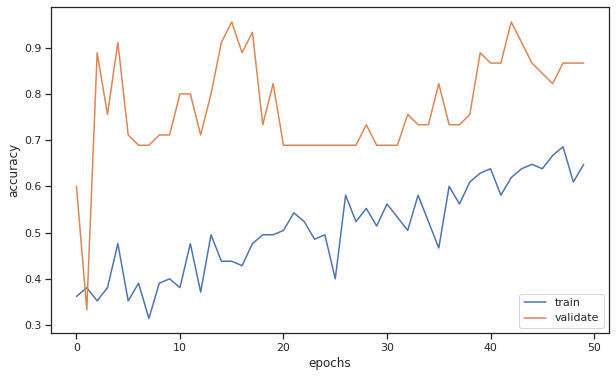

 59%|█████▉    | 19/32 [00:23<00:16,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 100, 'dense_2': 200, 'dropout': 0.05, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200345Z
test loss: 0.13380745516883003
test accuracy: 0.9555555582046509
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 35


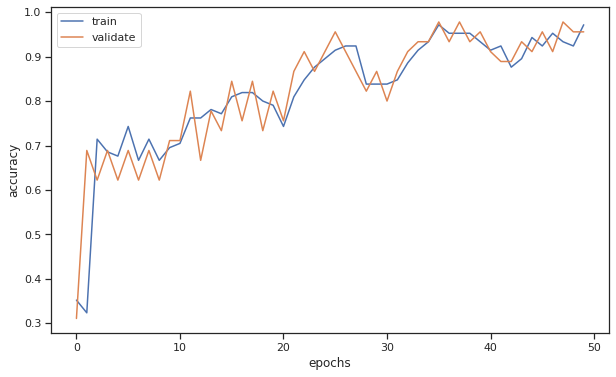

 62%|██████▎   | 20/32 [00:24<00:15,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 10, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200346Z
test loss: 0.34751649333371054
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 45


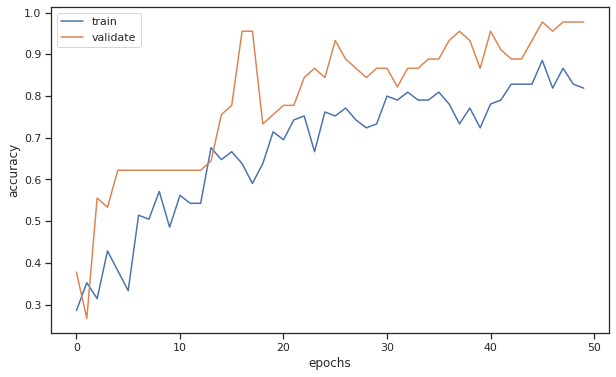

 66%|██████▌   | 21/32 [00:26<00:13,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 50, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200347Z
test loss: 0.22185301846928066
test accuracy: 0.9555555582046509
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 23


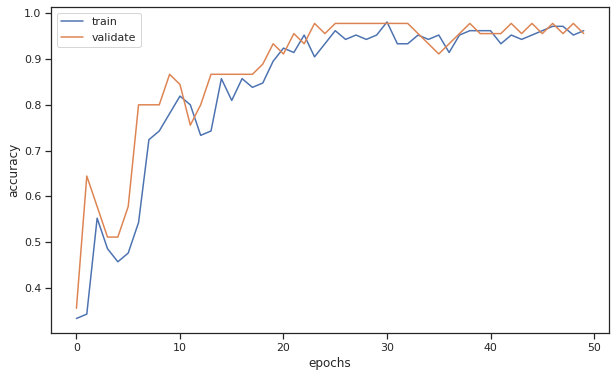

 69%|██████▉   | 22/32 [00:27<00:12,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 10, 'dropout': 0.9, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200348Z
test loss: 0.9932100560930041
test accuracy: 0.4888888895511627
max. test accuracy observed: 0.5555555820465088
max. test accuracy history index: 48


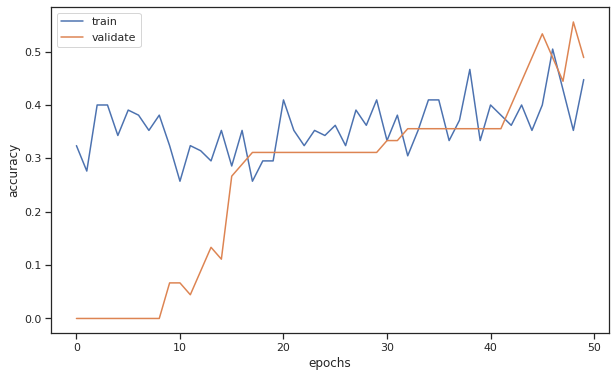

 72%|███████▏  | 23/32 [00:28<00:11,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 200, 'dense_2': 50, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200350Z
test loss: 0.14846392025550206
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 21


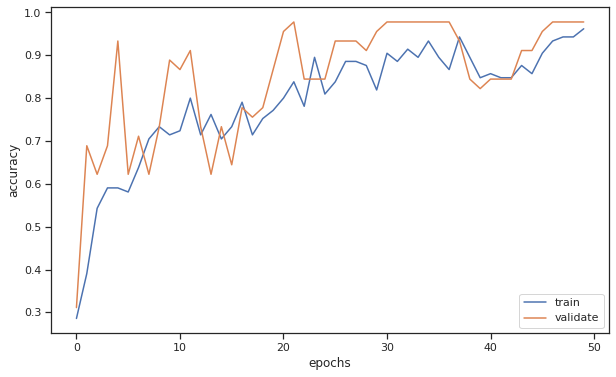

 75%|███████▌  | 24/32 [00:29<00:10,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 50, 'dropout': 0.05, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200351Z
test loss: 0.17034998370541465
test accuracy: 0.9111111164093018
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 11


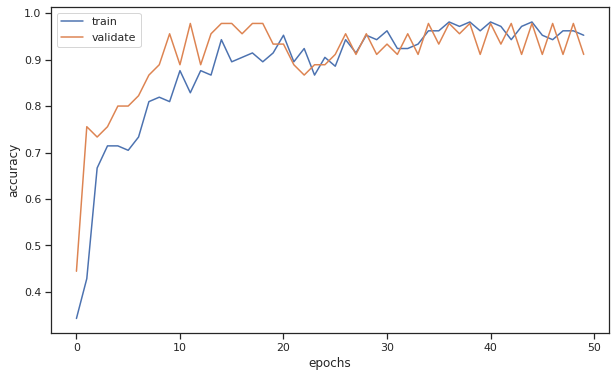

 78%|███████▊  | 25/32 [00:31<00:08,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 200, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200352Z
test loss: 0.2139924094080925
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 16


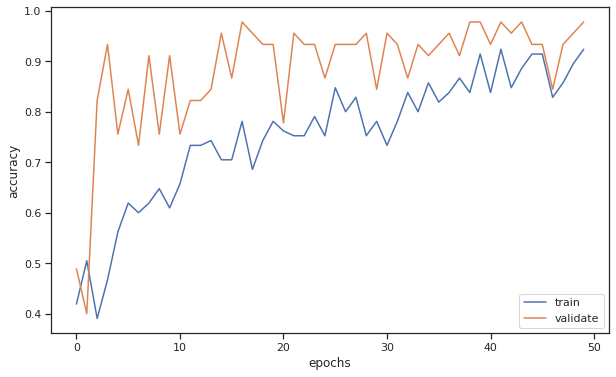

 81%|████████▏ | 26/32 [00:32<00:07,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 50, 'dense_2': 200, 'dropout': 0.9, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200353Z
test loss: 0.38898571994569564
test accuracy: 0.8222222328186035
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 21


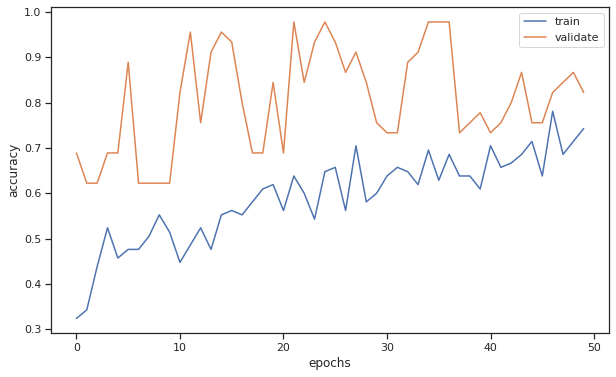

 84%|████████▍ | 27/32 [00:33<00:06,  1.26s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 200, 'dense_2': 200, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200355Z
test loss: 0.15617123722202247
test accuracy: 0.9555555582046509
max. test accuracy observed: 0.9555555582046509
max. test accuracy history index: 19


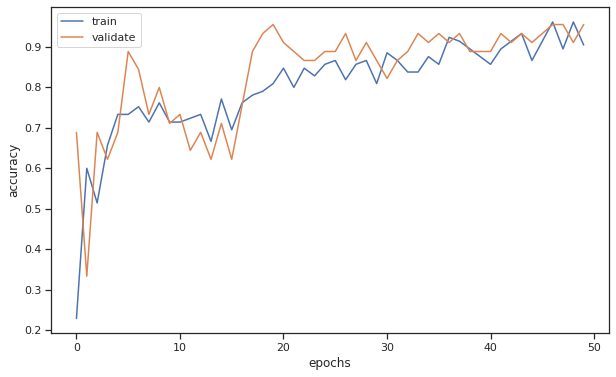

 88%|████████▊ | 28/32 [00:34<00:05,  1.26s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 50, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200356Z
test loss: 0.30504524840248953
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 40


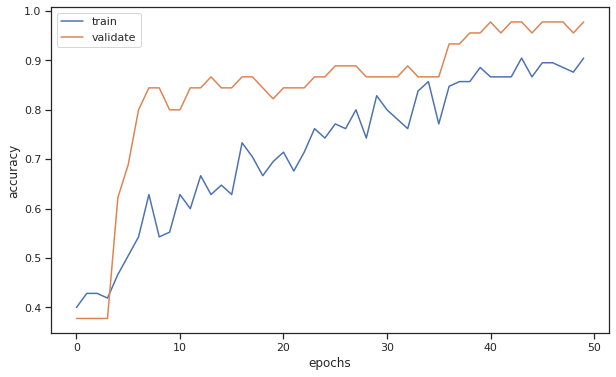

 91%|█████████ | 29/32 [00:36<00:03,  1.26s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 200, 'dense_2': 50, 'dropout': 0.02, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200357Z
test loss: 0.22682553951938947
test accuracy: 0.8888888955116272
max. test accuracy observed: 0.9333333373069763
max. test accuracy history index: 43


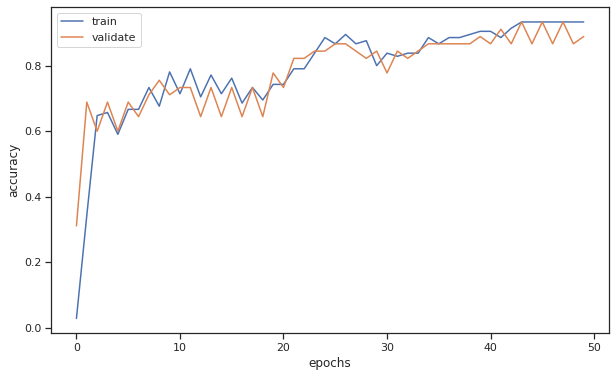

 94%|█████████▍| 30/32 [00:37<00:02,  1.25s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 10, 'dense_2': 50, 'dropout': 0.05, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200358Z
test loss: 0.2937605447239346
test accuracy: 0.8888888955116272
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 28


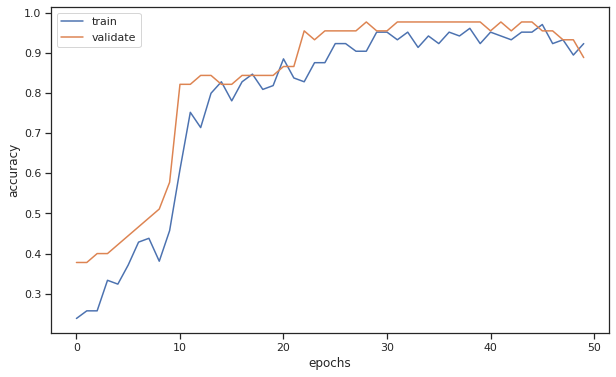

 97%|█████████▋| 31/32 [00:38<00:01,  1.26s/it]

{'activation': 'tanh', 'batch_size': 128, 'dense_1': 100, 'dense_2': 10, 'dropout': 0.5, 'epochs': 50, 'losses': 'categorical_crossentropy', 'optimizer': 'nadam'}
2020-01-20T200400Z
test loss: 0.3512664281659656
test accuracy: 0.9777777791023254
max. test accuracy observed: 0.9777777791023254
max. test accuracy history index: 39


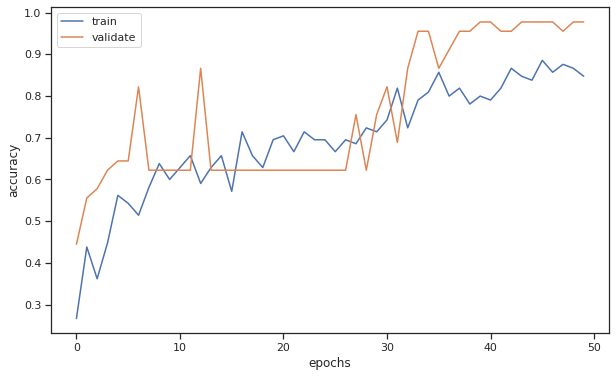

100%|██████████| 32/32 [00:40<00:00,  1.25s/it]

stop: 2020-01-20T200400Z
CPU times: user 44.4 s, sys: 881 ms, total: 45.3 s
Wall time: 40 s


In [10]:
%%time
parameters = {
    'batch_size': [128],
    'epochs'    : [50],
    'dropout'   : [0.05, 0.02, 0.5, 0.9],
    'activation': ['tanh'],
    'dense_1'   : [10, 50, 100, 200],
    'dense_2'   : [10, 50, 100, 200],
    'optimizer' : ['nadam'],
    'losses'    : ['categorical_crossentropy'],
}

def hmodel_convolutional(
    x_train,
    y_train,
    x_test,
    y_test,
    parameters
    ):
    print(parameters)
    model = Sequential()
    model.add(Conv1D(32, (3), input_shape=(4, 1), activation=parameters['activation']))
    model.add(MaxPooling1D(pool_size=(2)))
    model.add(Flatten())
    model.add(Dropout(rate=parameters['dropout']))
    model.add(Dense(parameters['dense_1'], activation=parameters['activation']))
    model.add(Dense(parameters['dense_2'], activation=parameters['activation']))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(
        loss      = parameters['losses'],
        optimizer = parameters['optimizer'],
        metrics   = ['accuracy']
    )
    out = model.fit(
        x_train,
        y_train,
        batch_size      = parameters['batch_size'],
        epochs          = parameters['epochs'],
        verbose         = False,
        validation_data = [x_test, y_test]
    )
    score = model.evaluate(x_test, y_test, verbose=False)
    print(datetime.datetime.utcnow().strftime("%Y-%m-%dT%H%M%SZ"))
    print('test loss:', score[0])
    print('test accuracy:', score[1])
    print('max. test accuracy observed:', max(out.history['val_accuracy']))
    print('max. test accuracy history index:', out.history['val_accuracy'].index(max(out.history['val_accuracy'])))
    plt.plot(out.history['accuracy'], label='train')
    plt.plot(out.history['val_accuracy'], label='validate')
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.show()
    return out, model

print("start: "+datetime.datetime.utcnow().strftime("%Y-%m-%dT%H%M%SZ"))
h = ta.Scan(
    x               = x,
    y               = y,
    params          = parameters,
    experiment_name = 'iris',
    model           = hmodel_convolutional,
    fraction_limit  = 0.5
)
print("stop: "+datetime.datetime.utcnow().strftime("%Y-%m-%dT%H%M%SZ"))

# reporting on scan

In [11]:
r = ta.Analyze(h)
r.data.sort_values(by=['val_accuracy'], ascending=False).head()

,round_epochs,val_loss,val_accuracy,loss,accuracy,activation,batch_size,dense_1,dense_2,dropout,epochs,losses,optimizer
31,50,0.351266,0.977778,0.415004,0.847619,tanh,128,100,10,0.50,50,categorical_crossentropy,nadam
17,50,0.147683,0.977778,0.169234,0.942857,tanh,128,50,200,0.05,50,categorical_crossentropy,nadam
15,50,0.220925,0.977778,0.237073,0.942857,tanh,128,100,10,0.05,50,categorical_crossentropy,nadam
14,50,0.173795,0.977778,0.176706,0.942857,tanh,128,10,200,0.02,50,categorical_crossentropy,nadam
12,50,0.151388,0.977778,0.156932,0.971429,tanh,128,100,50,0.02,50,categorical_crossentropy,nadam


In [12]:
r.data.corr().sort_values(by=['val_accuracy'], ascending=False)

,round_epochs,val_loss,val_accuracy,loss,accuracy,batch_size,dense_1,dense_2,dropout,epochs
val_accuracy,NaN,-0.872781,1.000000,-0.808226,0.807338,NaN,0.285530,0.288907,-0.555283,NaN
accuracy,NaN,-0.889314,0.807338,-0.972991,1.000000,NaN,0.199066,0.219996,-0.862271,NaN
dense_2,NaN,-0.434195,0.288907,-0.337863,0.219996,NaN,0.072855,1.000000,-0.098439,NaN
dense_1,NaN,-0.363502,0.285530,-0.276537,0.199066,NaN,1.000000,0.072855,0.035794,NaN
dropout,NaN,0.661260,-0.555283,0.826547,-0.862271,NaN,0.035794,-0.098439,1.000000,NaN
loss,NaN,0.948110,-0.808226,1.000000,-0.972991,NaN,-0.276537,-0.337863,0.826547,NaN
val_loss,NaN,1.000000,-0.872781,0.948110,-0.889314,NaN,-0.363502,-0.434195,0.661260,NaN
round_epochs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
batch_size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
epochs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


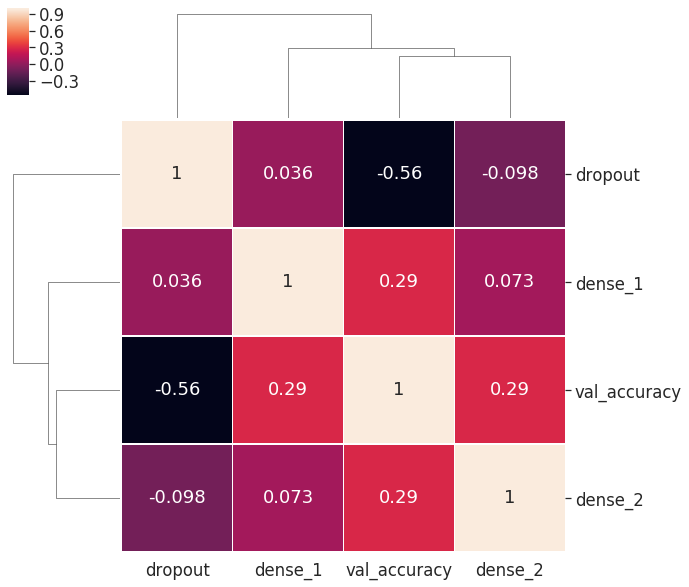

In [13]:
df = r.data[['val_accuracy', 'dense_1', 'dense_2', 'dropout']]

sns.set(font_scale=1.5)
plot = sns.clustermap(df.corr(), linewidths=0.1, annot=True) #cmap='Greys'
_ = plt.setp(plot.ax_heatmap.get_yticklabels(), rotation=0)
sns.set(font_scale=1)